In [19]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # y값 one-hot으로 바꿔주기

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
# set variables 
nb_classes = 10

X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

w = tf.Variable(tf.random_normal([784, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [6]:
# set hypothesis
hypothesis = tf.nn.softmax(tf.matmul(X,w)+b)

In [7]:
# set cost function
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

In [8]:
# set optimizer and minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))

In [10]:
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [13]:
# Training epoch/batch
# 1000개의 데이터, batch size가 500이라면 total batch는 2이고, 
# 두번째 batch를 돌면 1epoch가 된다,
training_epochs = 15 # 전체 데이터 셋을 한번 학습시킨 것(한바퀴 돈 것)
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            # 데이터가 많으므로 100씩 호출
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
        print("Epoch:", '%04d' % (epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))
    
    # Test the model using test sets
    # sess.run() == accuracy.eval()
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Epoch: 0001 cost= 3.106490630
Epoch: 0002 cost= 1.163147473
Epoch: 0003 cost= 0.910800812
Epoch: 0004 cost= 0.790241858
Epoch: 0005 cost= 0.715625752
Epoch: 0006 cost= 0.663265354
Epoch: 0007 cost= 0.623770156
Epoch: 0008 cost= 0.592704001
Epoch: 0009 cost= 0.567818008
Epoch: 0010 cost= 0.546562001
Epoch: 0011 cost= 0.527640904
Epoch: 0012 cost= 0.512633685
Epoch: 0013 cost= 0.498606851
Epoch: 0014 cost= 0.486469771
Epoch: 0015 cost= 0.475411175
Accuracy:  0.8877


### Sample image show and prediction

In [14]:
import random

Label: [8]
Prediction: [7]


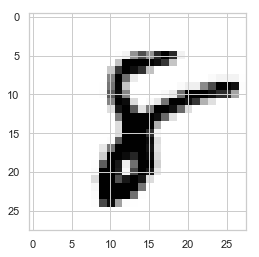

In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.show()